/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 36845 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python

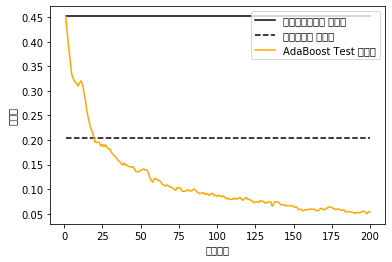

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

# 设置AdaBoost迭代次数
n_estimators=200
# 创建数据集
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从12000个数据中取前2000行作为测试集，其余作为训练集
train_x, train_y = X[2000:],y[2000:]
test_x, test_y = X[:2000],y[:2000]

# 1、决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# 2、弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# 3、弱分类器组成 AdaBoost 分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)

# 三个分类器的错误率可视化
fig = plt.figure()
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)

# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()